### DESCRIPTORES DE MERCADO POR SEGMENTO
**ANALISIS DE TRANSACCIONES E INFRAESTRUCTURAS POR SEGMENTO DE MERCADO**

_By Diego Tondo, August 2020_

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.set_printoptions(precision=2)
pd.set_option("display.precision", 2)

In [4]:
#dft = pd.read_csv('../dataset/data_csv/sis_transa_201801_202007_merged.csv.gz', 
#                 parse_dates=['fecha'], 
#                 compression='zip')
dft = pd.read_pickle('sis_transa_201801_202007_merged.pkl.zip')
dft.shape

(2805130, 29)

In [5]:
#dft['id_empresa'] = dft['id_empresa'].astype('int')
dft = dft[(dft['segmento']!='Demo')]
dft.shape

(2719611, 29)

In [6]:
dft.columns

Index(['id_transaccion', 'id_vehiculo', 'id_usuario', 'id_equipo', 'id_bomba',
       'id_tanque', 'producto', 'fecha_hora', 'fecha_hora_stop',
       'departamento', 'codigo_error', 'cantidad', 'volume_start',
       'volume_stop', 'temp_start', 'temp_stop', 'geo_latitud', 'geo_longitud',
       'baja_transaccion', 'id_empresa', 'current_firmware', 'delay_ue',
       'geo_latitude', 'geo_longitude', 'hash_empresa', 'baja_empresa',
       'segmento', 'baja_vehiculo', 'main_id'],
      dtype='object')

In [7]:
dft18 = dft[ (dft['fecha_hora']<'2019-01-01') ]
dft19 = dft[ (dft['fecha_hora']<'2020-01-01') & (dft['fecha_hora']>='2019-01-01') ]
dft20 = dft[ (dft['fecha_hora']>='2020-01-01') ]

In [8]:
dft18.shape, dft19.shape, dft20.shape

((1001166, 29), (1271541, 29), (446904, 29))

#### DESCRIPTORES GENERALES DE MERCADO

In [9]:
## CANTIDAD DE EMPRESAS POR AÑO
qemp = np.asarray([dft18['id_empresa'].nunique(), dft19['id_empresa'].nunique(), dft20['id_empresa'].nunique()])
print(qemp)

[197 219 200]


In [10]:
## CANTIDAD DE EMPRESAS POR AÑO
scant = np.asarray([dft18['cantidad'].sum(), dft19['cantidad'].sum(), dft20['cantidad'].sum()])
print(f'Litros controlados por año: {scant}')

Litros controlados por año: [1.38e+08 1.82e+08 6.21e+07]


In [11]:
print(f'Litros controlados en 20 respecto de 19: %{scant[2]/scant[1]*100}')

Litros controlados en 20 respecto de 19: %34.08125936985016


In [12]:
print(f'Litros controlados por empresa: {scant/qemp}')

Litros controlados por empresa: [699179.37 832587.54 310713.16]


In [13]:
print(f'Litros controlados por empresa por mes: {scant/qemp/12}')

Litros controlados por empresa por mes: [58264.95 69382.3  25892.76]


In [14]:
## CANTIDAD DE SITIOS POR EMPRESA
qsites = np.asarray([dft18['id_equipo'].nunique(), dft19['id_equipo'].nunique(), dft20['id_equipo'].nunique()])
qsites

array([253, 373, 281])

In [15]:
print(f'Sitios controlados por empresa: {qsites/qemp}')

Sitios controlados por empresa: [1.28 1.7  1.41]


In [16]:
qtanks = np.asarray([dft18['id_tanque'].nunique(), dft19['id_tanque'].nunique(), dft20['id_tanque'].nunique()])
qtanks

array([327, 536, 348])

In [17]:
print(f'Tanques controlados por empresa: {qtanks/qemp}')

Tanques controlados por empresa: [1.66 2.45 1.74]


In [18]:
print(f'Tanques controlados por sitio: {qtanks/qsites}')

Tanques controlados por sitio: [1.29 1.44 1.24]


#### DESCRIPTORES DE TRANSACCIONES POR SEGMENTO DE MERCADO

In [19]:
def TransactionsGroupedBySegment(df):
    dfg = df.groupby(['segmento'])['cantidad'].describe()
    dfg['count %'] = dfg['count']/dfg['count'].sum()*100
    dfg = dfg.transpose()
    return dfg

In [20]:
for i in (18, 19, 20):
    vars()[f'dft{i}_s_qtran'] = TransactionsGroupedBySegment(eval(f'dft{i}'))

In [21]:
dft19_s_qtran

segmento,Agro,Constructoras,Estaciones de Servicio,Industria,Mineria,Oil and Gas,Telcos,Transporte
count,108313.00,101517.00,454710.00,76365.00,29444.00,132128.00,7487.00,361577.00
mean,187.43,213.32,22.53,110.02,284.09,281.35,91.75,208.82
std,421.27,684.38,65.13,169.06,520.00,848.15,105.81,237.02
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,51.70,50.14,2.49,43.35,41.36,38.03,22.95,66.24
50%,100.17,97.76,7.83,62.27,150.21,65.00,69.65,133.02
75%,201.12,183.90,17.81,112.61,372.70,195.02,124.62,279.17
max,9999.26,100000.00,9997.90,5000.54,10002.22,36871.30,1148.18,13502.57
count %,8.52,7.98,35.76,6.01,2.32,10.39,0.59,28.44


In [22]:
dft18_s_qtran

segmento,Agro,Constructoras,Estaciones de Servicio,Industria,Mineria,Oil and Gas,Transporte
count,53230.00,91718.00,394633.00,38032.00,10010.00,81362.00,332181.00
mean,162.00,191.35,19.96,128.03,242.28,338.60,207.25
std,261.76,430.03,197.21,189.89,229.94,1251.74,264.08
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,50.01,50.01,2.58,44.33,66.47,37.48,63.32
50%,93.13,95.53,7.13,67.06,183.35,51.64,125.02
75%,200.22,182.10,15.05,120.06,317.17,146.02,256.02
max,9999.25,8000.00,29063.79,4000.00,1200.20,100000.00,15039.84
count %,5.32,9.16,39.42,3.80,1.00,8.13,33.18


In [23]:
dft19_s_qtran

segmento,Agro,Constructoras,Estaciones de Servicio,Industria,Mineria,Oil and Gas,Telcos,Transporte
count,108313.00,101517.00,454710.00,76365.00,29444.00,132128.00,7487.00,361577.00
mean,187.43,213.32,22.53,110.02,284.09,281.35,91.75,208.82
std,421.27,684.38,65.13,169.06,520.00,848.15,105.81,237.02
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,51.70,50.14,2.49,43.35,41.36,38.03,22.95,66.24
50%,100.17,97.76,7.83,62.27,150.21,65.00,69.65,133.02
75%,201.12,183.90,17.81,112.61,372.70,195.02,124.62,279.17
max,9999.26,100000.00,9997.90,5000.54,10002.22,36871.30,1148.18,13502.57
count %,8.52,7.98,35.76,6.01,2.32,10.39,0.59,28.44


In [24]:
dft20_s_qtran

segmento,Agro,Constructoras,Estaciones de Servicio,Industria,Mineria,Oil and Gas,Transporte
count,45671.00,33401.00,157244.00,45034.00,9209.00,40694.00,115651.00
mean,200.24,166.96,25.25,139.88,411.70,195.18,219.77
std,523.06,418.82,101.40,207.44,778.29,669.81,232.18
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,37.26,47.80,2.15,51.43,49.31,38.90,69.06
50%,85.15,82.34,7.38,83.00,185.01,61.02,150.00
75%,200.85,161.60,16.76,144.00,689.80,136.19,303.69
max,10021.50,10403.61,11924.48,4994.14,12843.70,19216.64,6999.02
count %,10.22,7.47,35.19,10.08,2.06,9.11,25.88


In [25]:
## SAVE DATA TO CSV
#[eval(f'dft{i}_s_qtran').to_csv(f'../results/dft{i}_s_qtran.csv') for i in (18, 19, 20)]

**BOXPLOT**

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
sns.set_style("whitegrid", {"grid.color": ".9"})

In [28]:
segList = ['Agriculture', 'Construction', 'Service Stations', 'Industry', 'Mining',  'Oil&Gas', 'Telcos', 'Transportation']

In [29]:
dft19 = dft19.sort_values(by=['segmento'])

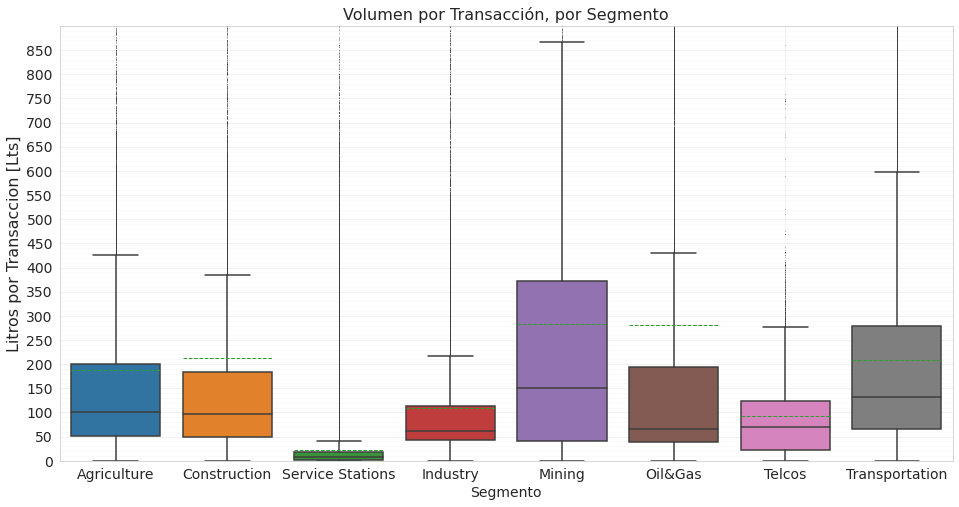

In [30]:
fig = plt.figure(figsize=(16,8))

ax = sns.boxplot(data=dft19, x='segmento', y='cantidad', showmeans=True, meanline=True, 
                 flierprops = dict(markerfacecolor='0.5', markersize=0.1, linestyle='none'))

plt.title("Volumen por Transacción, por Segmento",fontsize=16)
plt.ylabel('Litros por Transaccion [Lts]',fontsize=16)
plt.xlabel('Segmento', fontsize=14)

major_ticks = np.arange(0, 900, 50)
minor_ticks = np.arange(0, 900, 10)

plt.grid(True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
#plt.xticks(fontsize=16)
plt.xticks(np.arange(8), segList, fontsize=14, rotation=0)
plt.yticks(fontsize=14)

plt.ylim(0, 900)

ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.75)

#sns.despine()
plt.show()

In [31]:
#fig.savefig('../results/boxplot_volxtransaxseg.png', bbox_inches = 'tight')

#### CONSUMO POR EMPRESA

In [32]:
def TransactionsGroupedBySegAndCompany(dft):
    dft_cons = dft.groupby(['segmento','id_empresa'])['cantidad'].sum()
    ctot = dft_cons.sum()
    dft_s_vtran = dft_cons.groupby('segmento').describe()
    etot = dft19['id_empresa'].nunique()
    dft_s_vtran['count %'] = dft_s_vtran['count']/etot*100 
    dft_s_vtran['mean monthly'] = dft_s_vtran['mean']/12
    dft_s_vtran['vol'] = dft_cons.groupby('segmento').sum()
    dft_s_vtran['vol %'] = dft_s_vtran['vol']/ctot*100
    dft_s_vtran['vol per comp'] = dft_s_vtran['vol']/dft_s_vtran['count']
    dft_s_vtran['vol monthly'] = dft_s_vtran['vol']/12
    dft_s_vtran = dft_s_vtran.transpose()
    return (dft_s_vtran, dft_cons)

In [33]:
for i in 18, 19, 20:
    vars()[f'dft{i}_s_vtran'], vars()[f'dft{i}_cons'] = TransactionsGroupedBySegAndCompany(eval(f'dft{i}'))

In [34]:
dft18_s_vtran

segmento,Agro,Constructoras,Estaciones de Servicio,Industria,Mineria,Oil and Gas,Transporte
count,3.50e+01,3.40e+01,7.00e+00,1.80e+01,5.00e+00,2.00e+01,7.80e+01
mean,2.46e+05,5.16e+05,1.13e+06,2.71e+05,4.85e+05,1.38e+06,8.83e+05
std,2.14e+05,7.02e+05,1.12e+06,3.04e+05,5.21e+05,4.53e+06,1.52e+06
min,1.25e+02,0.00e+00,0.00e+00,1.66e+02,2.26e+02,0.00e+00,0.00e+00
25%,6.67e+04,5.80e+04,2.84e+05,8.08e+04,9.23e+04,4.20e+04,2.15e+05
50%,2.09e+05,2.22e+05,1.02e+06,2.30e+05,4.14e+05,1.84e+05,4.13e+05
75%,3.55e+05,7.33e+05,1.58e+06,3.15e+05,6.12e+05,7.76e+05,1.06e+06
max,6.90e+05,3.25e+06,3.13e+06,1.16e+06,1.31e+06,2.06e+07,1.00e+07
count %,1.60e+01,1.55e+01,3.20e+00,8.22e+00,2.28e+00,9.13e+00,3.56e+01
mean monthly,2.05e+04,4.30e+04,9.38e+04,2.25e+04,4.04e+04,1.15e+05,7.36e+04


In [35]:
dft19_s_vtran

segmento,Agro,Constructoras,Estaciones de Servicio,Industria,Mineria,Oil and Gas,Telcos,Transporte
count,3.90e+01,3.30e+01,6.00e+00,2.30e+01,9.00e+00,3.00e+01,1.00,7.80e+01
mean,5.21e+05,6.56e+05,1.71e+06,3.65e+05,9.29e+05,1.24e+06,686937.38,9.68e+05
std,7.64e+05,8.55e+05,1.67e+06,4.78e+05,1.58e+06,3.85e+06,NaN,1.47e+06
min,3.31e+02,9.95e+02,6.17e+04,5.45e+02,0.00e+00,0.00e+00,686937.38,0.00e+00
25%,1.09e+05,1.19e+05,2.66e+05,3.82e+04,2.07e+04,6.43e+04,686937.38,1.85e+05
50%,3.07e+05,3.32e+05,1.62e+06,2.29e+05,4.39e+05,3.00e+05,686937.38,4.19e+05
75%,6.11e+05,8.23e+05,2.94e+06,4.98e+05,1.06e+06,8.09e+05,686937.38,1.17e+06
max,4.29e+06,3.44e+06,3.76e+06,1.77e+06,4.99e+06,2.12e+07,686937.38,8.85e+06
count %,1.78e+01,1.51e+01,2.74e+00,1.05e+01,4.11e+00,1.37e+01,0.46,3.56e+01
mean monthly,4.34e+04,5.47e+04,1.42e+05,3.04e+04,7.75e+04,1.03e+05,57244.78,8.07e+04


In [36]:
dft20_s_vtran

segmento,Agro,Constructoras,Estaciones de Servicio,Industria,Mineria,Oil and Gas,Transporte
count,3.70e+01,3.30e+01,6.00e+00,2.10e+01,8.00e+00,2.50e+01,7.00e+01
mean,2.47e+05,1.69e+05,6.62e+05,3.00e+05,4.74e+05,3.18e+05,3.63e+05
std,3.99e+05,2.26e+05,6.21e+05,8.02e+05,7.83e+05,4.67e+05,4.35e+05
min,0.00e+00,0.00e+00,7.12e+04,2.92e+02,2.48e+02,1.25e-01,0.00e+00
25%,5.19e+04,2.88e+04,1.32e+05,2.24e+04,5.91e+04,4.00e+04,9.11e+04
50%,1.31e+05,9.27e+04,5.33e+05,5.94e+04,1.19e+05,1.51e+05,1.94e+05
75%,2.79e+05,2.38e+05,1.14e+06,1.61e+05,4.17e+05,3.41e+05,4.68e+05
max,2.25e+06,1.00e+06,1.49e+06,3.72e+06,2.22e+06,1.87e+06,2.34e+06
count %,1.69e+01,1.51e+01,2.74e+00,9.59e+00,3.65e+00,1.14e+01,3.20e+01
mean monthly,2.06e+04,1.41e+04,5.52e+04,2.50e+04,3.95e+04,2.65e+04,3.03e+04


In [38]:
## SAVE DATA TO CSV
[eval(f'dft{i}_s_vtran').to_csv(f'./results/dft{i}_s_vtran.csv') for i in (18, 19, 20)]

[None, None, None]

**BOXPLOT**

In [39]:
dfc = dft19_cons.reset_index()

In [40]:
dfc['cantidad m'] = dfc['cantidad']/12

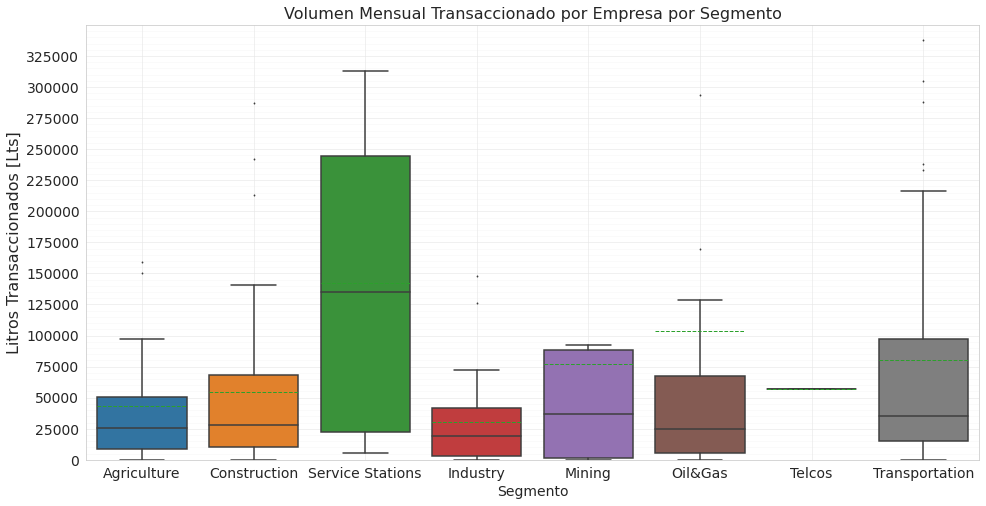

In [61]:
fig = plt.figure(figsize=(16,8))

ax = sns.boxplot(data=dfc, x='segmento', y='cantidad m', showmeans=True, meanline=True, 
                 flierprops = dict(markerfacecolor='0.5', markersize=1, linestyle='none'))

plt.title("Volumen Mensual Transaccionado por Empresa por Segmento",fontsize=16)
plt.ylabel('Litros Transaccionados [Lts]',fontsize=16)
plt.xlabel('Segmento', fontsize=14)

major_ticks = np.arange(0, 350000, 25000)
minor_ticks = np.arange(0, 350000, 5000)
plt.ylim(0, 350000)

plt.grid(True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
plt.xticks(fontsize=16)
plt.xticks(np.arange(8), segList, fontsize=14, rotation=0)
plt.yticks(fontsize=14)

ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.75)

#sns.despine()
plt.show()

In [48]:
#fig.savefig('../results/boxplot_volxempresaxseg.png', bbox_inches = 'tight')

#### ANALISIS DE INFRAESTRUCTURAS POR SEGMENTO

In [42]:
def infra(df):
    df_infra = df.groupby(['segmento','id_empresa'])['id_equipo', 'id_tanque', 'main_id'].nunique()
    df_infra = df_infra.groupby('segmento').mean().transpose()
    return df_infra

In [43]:
for i in 18, 19, 20:
    vars()[f'dft{i}_infra'] = infra(eval(f'dft{i}'))

<ipython-input-42-78e8b64cf2f7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_infra = df.groupby(['segmento','id_empresa'])['id_equipo', 'id_tanque', 'main_id'].nunique()


In [44]:
dft20_infra, dft19_infra, dft18_infra

(segmento    Agro  Constructoras  Estaciones de Servicio  Industria  Mineria  \
 id_equipo   1.54           1.58                    1.33       1.24     1.25   
 id_tanque   1.73           1.79                    2.50       1.38     3.38   
 main_id    36.05          53.70                   25.33      27.52    19.25   
 
 segmento   Oil and Gas  Transporte  
 id_equipo         1.68        1.23  
 id_tanque         1.88        1.53  
 main_id          59.88       45.21  ,
 segmento    Agro  Constructoras  Estaciones de Servicio  Industria  Mineria  \
 id_equipo   1.46           1.91                    1.50       1.26     1.22   
 id_tanque   1.77           2.33                    3.00       1.57     3.44   
 main_id    41.13          58.55                   30.17      27.65    19.56   
 
 segmento   Oil and Gas  Telcos  Transporte  
 id_equipo         1.70    49.0        1.33  
 id_tanque         2.33   111.0        1.72  
 main_id          61.20     1.0       50.38  ,
 segmento    Agro 

In [45]:
## SAVE DATA TO CSV
#dft_infra19.to_csv('../results/dft19_infra.csv')

#### Distribuciones por Segmento

In [68]:
for y in (18, 19, 20):
    df = eval(f'dft{y}')
    for i in df['segmento'].unique():
        vname = i.replace(' ','_')
        vars()[f'{vname}{y}'] = df[df['segmento'].str.contains(str(i), regex=True)].groupby('id_empresa')['cantidad'].sum()/12
        vars()[f'{vname}{y}'] = vars()[f'{i}{y}'].reset_index()
        vars()[f'{vname}{y}'].name = f'{i}{y}'

In [69]:
def histograma(df):
    fig = plt.figure(figsize=(16,8))
    
    sns.distplot(df['cantidad'], bins=30)
    
    plt.title(f'Histograma de Empresas tipo {df.name} por Volumen Mensual',fontsize=16)
    plt.ylabel('Empresas',fontsize=16)
    plt.xlabel('Litros [Lts]', fontsize=14)
    plt.grid(axis='y', alpha=0.75)
    
    #plt.ylim(0, 50)
    plt.xlim(0, 200000)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=14)
    
    plt.show()

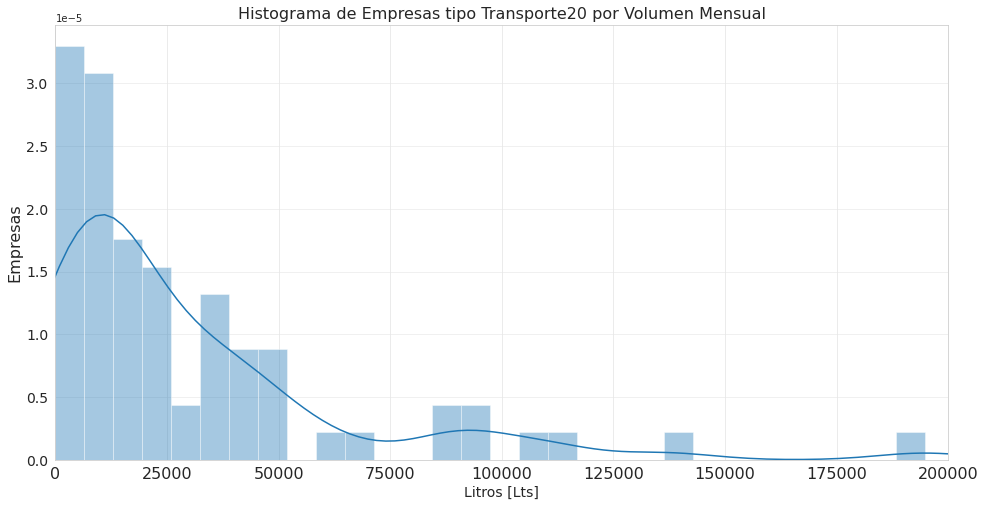

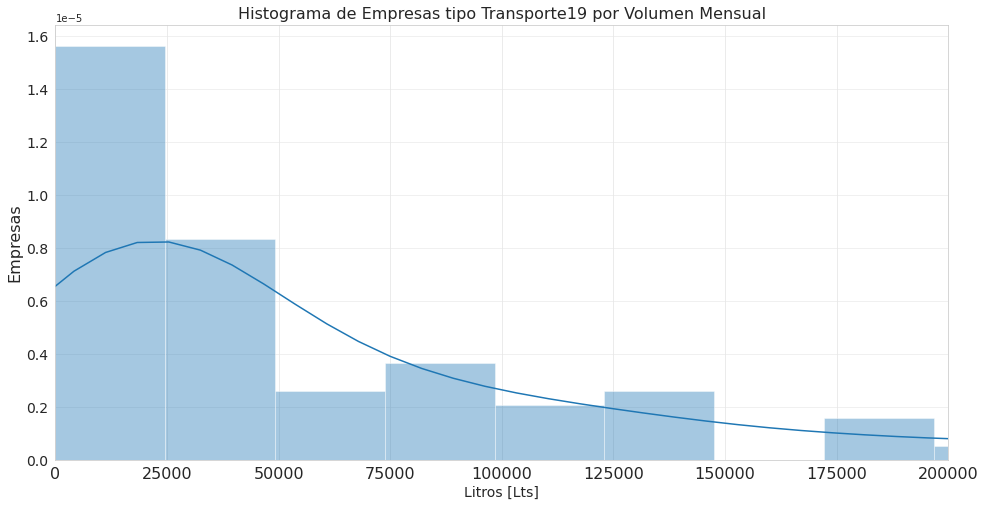

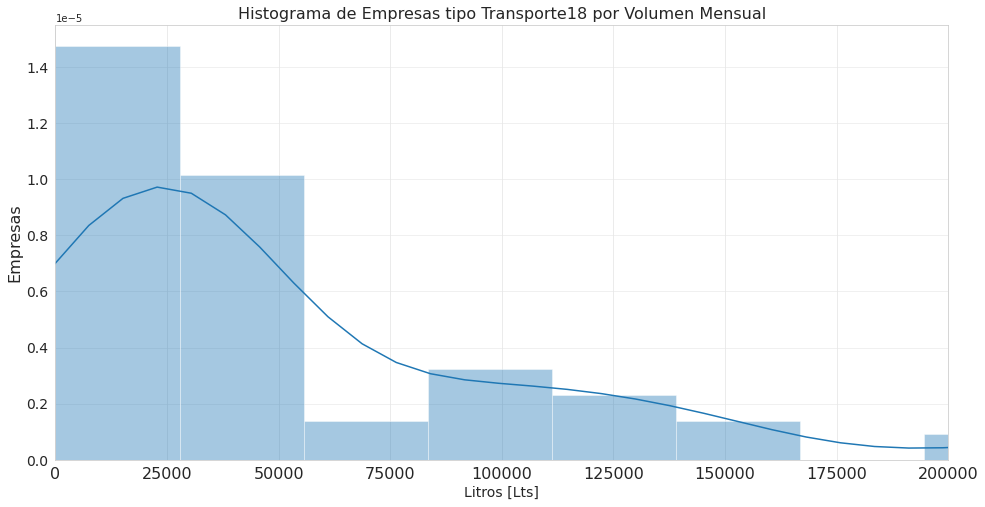

(None, None, None)

In [70]:
histograma(Transporte20), histograma(Transporte19), histograma(Transporte18)

In [71]:
#fig.savefig('../results/hist_t19.png', bbox_inches = 'tight')

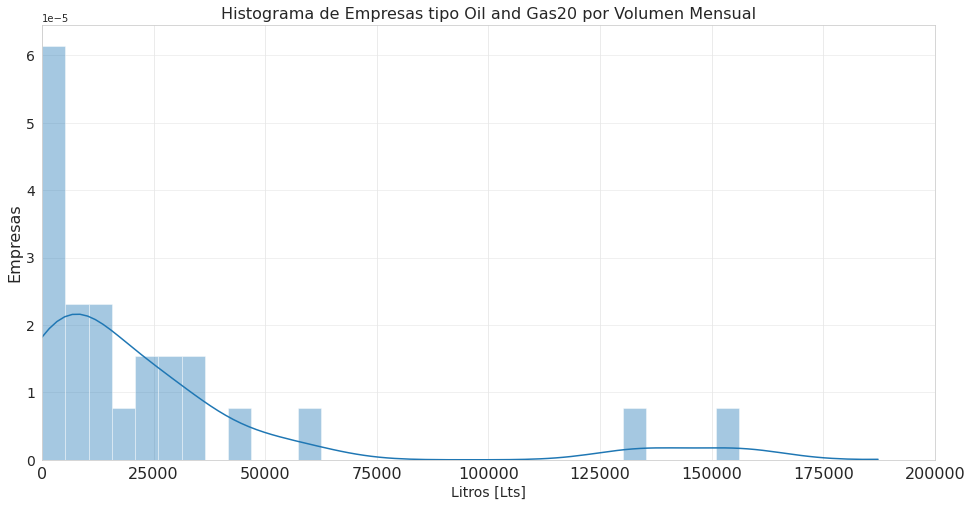

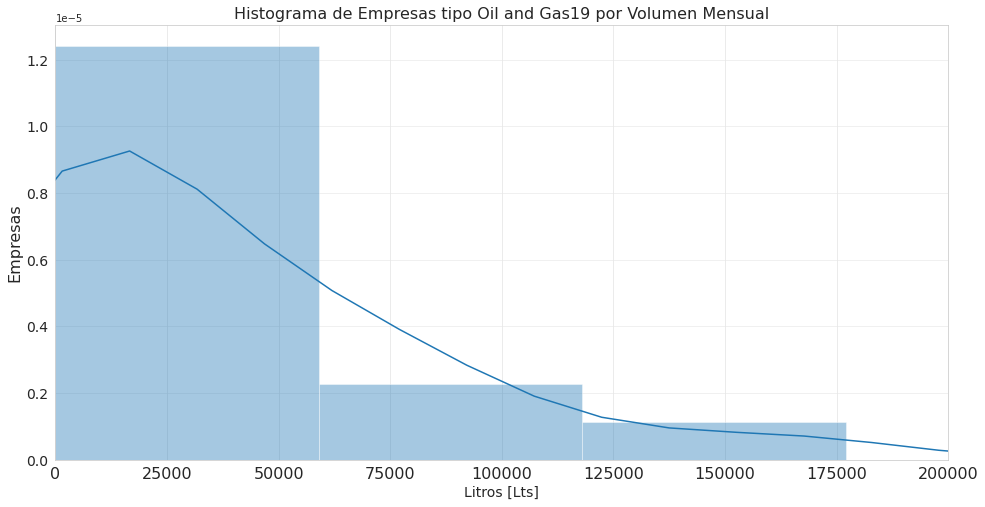

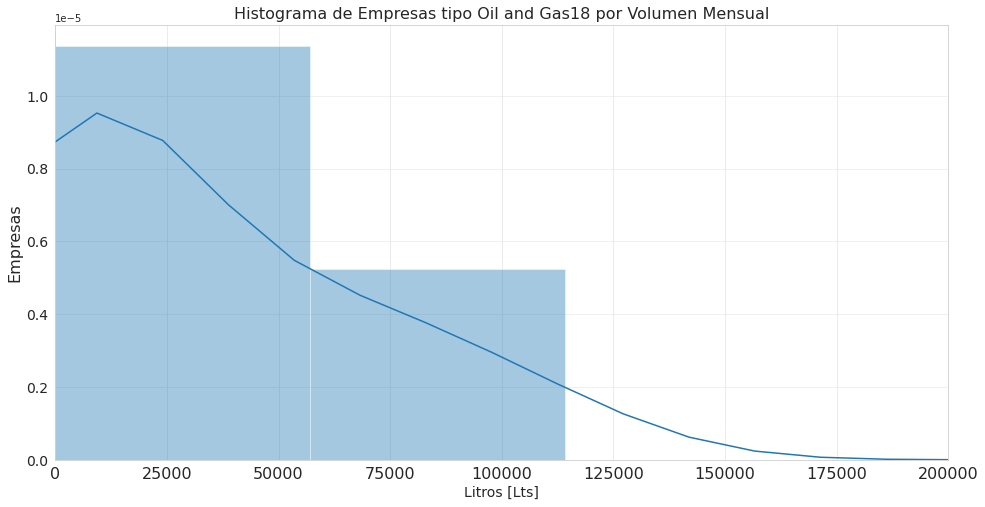

(None, None, None)

In [72]:
histograma(Oil_and_Gas20), histograma(Oil_and_Gas19), histograma(Oil_and_Gas18)